In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import folium
import os
import sys
import abstract_flows.arrow as arrow
import abstract_flows.grid as grid
import abstract_flows.flows as flows
from load_data import load_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

Datos sintéticos

In [2]:
bf =[]

for i in range(1, 4):
    f = np.load(f'synthetic_data/f{i}.npy')
    bf.append(f)

In [3]:
for f in bf:
    print('Flow')
    print(f)

Flow
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Flow
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Flow
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [4]:
laplacian = np.load('synthetic_data/laplacian.npy')
print('Laplacian')
print(laplacian)

Laplacian
[[ 1.         -0.5         0.         -0.40824829]
 [-0.5         1.          0.         -0.40824829]
 [ 0.          0.          1.         -0.57735027]
 [-0.40824829 -0.40824829 -0.57735027  1.        ]]


In [21]:
fs = np.load('synthetic_data/flows.npy')
print('Flows')
print(fs[0:2])
print('Cantidad de flujos', fs.shape[0])

Flows
[[[1.  0.  0.  0. ]
  [0.  1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]

 [[0.9 0.  0.  0. ]
  [0.1 1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]]
Cantidad de flujos 30


Resultados

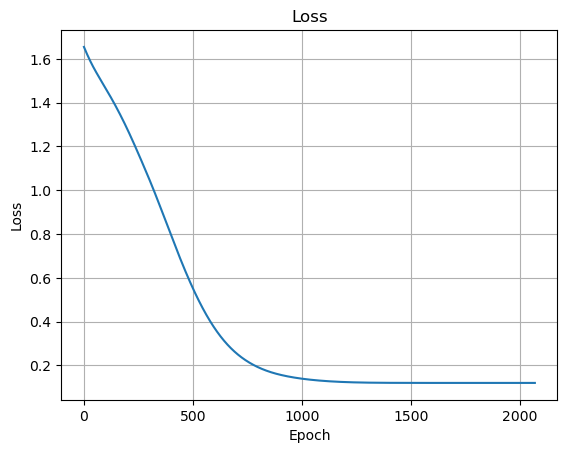

In [41]:
loss = np.load('results_little_experiment/loss.npy')
plt.plot(loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

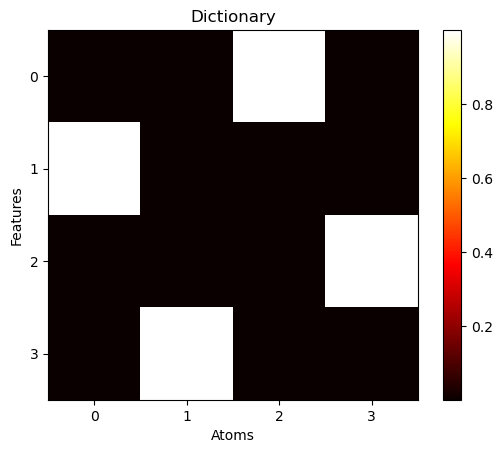

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


array([1., 1., 1., 1.], dtype=float32)

In [42]:
D = np.load('results_little_experiment/dictionary.npy')
plt.imshow(D, cmap='hot', interpolation='nearest')
plt.title('Dictionary')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D.shape[1], 1))
plt.yticks(np.arange(0, D.shape[0], 1))
plt.colorbar()
plt.show()
print(D)
D.sum(axis=0)

In [43]:
weights = np.load('results_little_experiment/weights.npy')
print(weights[1])
weights[1].sum(axis=1)

[[0.0998 0.9998 0.     0.0001]
 [0.0001 0.0001 0.9999 0.0001]
 [0.8998 0.0001 0.0001 0.0001]
 [0.0003 0.0001 0.     0.9997]]


array([1.0997, 1.0001, 0.9   , 1.0002], dtype=float32)

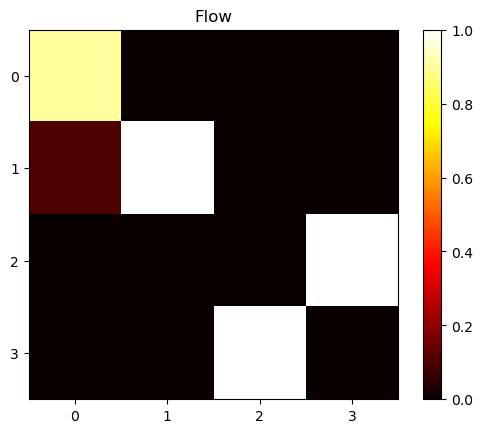

[[0.9 0.  0.  0. ]
 [0.1 1.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  1.  0. ]]


In [44]:
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs[1])

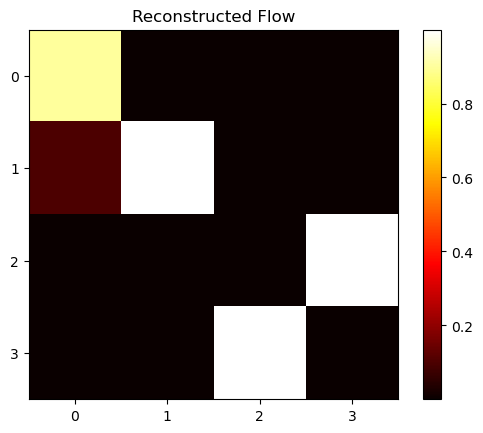

[[0.8998 0.0001 0.0001 0.0001]
 [0.0998 0.9998 0.     0.0001]
 [0.0003 0.0001 0.     0.9997]
 [0.0001 0.0001 0.9998 0.0001]]


In [45]:
fs_reconstructed = D@weights[1]
plt.imshow(fs_reconstructed, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow')
plt.xticks(np.arange(0, fs_reconstructed.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed)

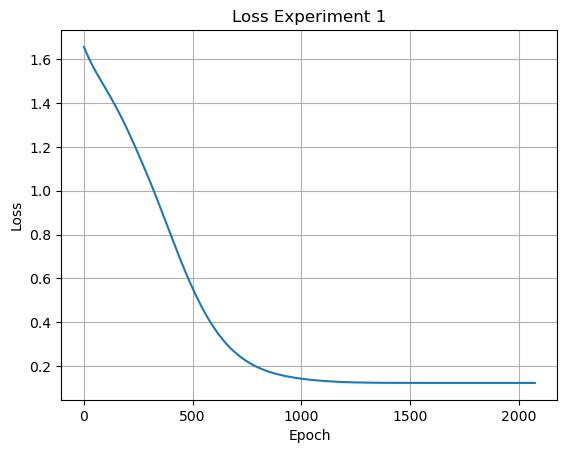

In [46]:
loss_1 = np.load('results_little_experiment_1/loss.npy')
plt.plot(loss_1)
plt.title('Loss Experiment 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

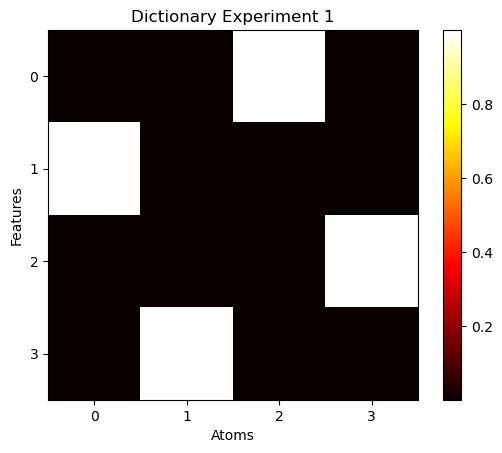

[[0.     0.     0.9995 0.0004]
 [0.9998 0.0001 0.0001 0.    ]
 [0.0002 0.     0.0002 0.9995]
 [0.     0.9999 0.0002 0.0001]]


array([1., 1., 1., 1.], dtype=float32)

In [47]:
D_1 = np.load('results_little_experiment_1/dictionary.npy')
plt.imshow(D_1, cmap='hot', interpolation='nearest')
plt.title('Dictionary Experiment 1')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D_1.shape[1], 1))
plt.yticks(np.arange(0, D_1.shape[0], 1))
plt.colorbar()
plt.show()
print(D_1)
D_1.sum(axis=0)

[[0.0996 0.9998 0.     0.0001]
 [0.0001 0.0001 0.9999 0.    ]
 [0.9001 0.0001 0.0001 0.0001]
 [0.0003 0.0001 0.     0.9998]]


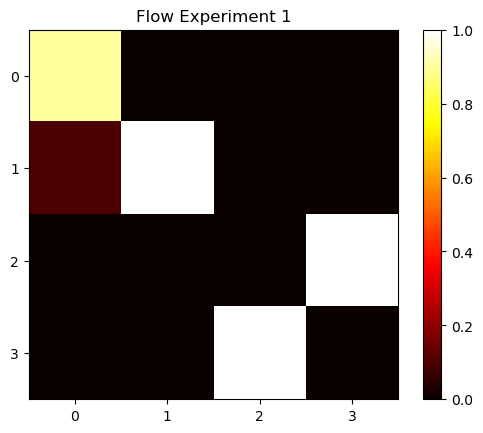

In [48]:
weights_1 = np.load('results_little_experiment_1/weights.npy')
print(weights_1[1])
weights_1[1].sum(axis=1)
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow Experiment 1')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()

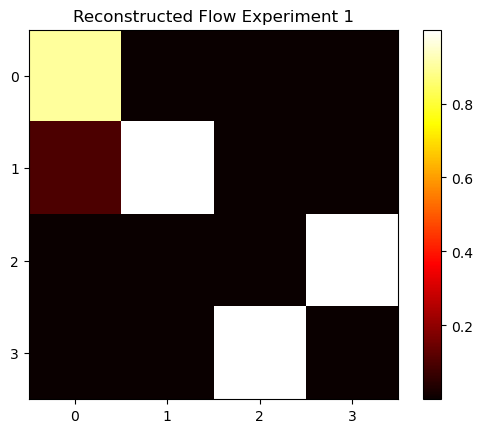

[[0.8996 0.0001 0.0001 0.0004]
 [0.0996 0.9996 0.0001 0.0001]
 [0.0004 0.0002 0.     0.9993]
 [0.0003 0.0001 0.9997 0.0001]]


In [49]:
fs_reconstructed_1 = D_1@weights_1[1]
plt.imshow(fs_reconstructed_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 1')
plt.xticks(np.arange(0, fs_reconstructed_1.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed_1)

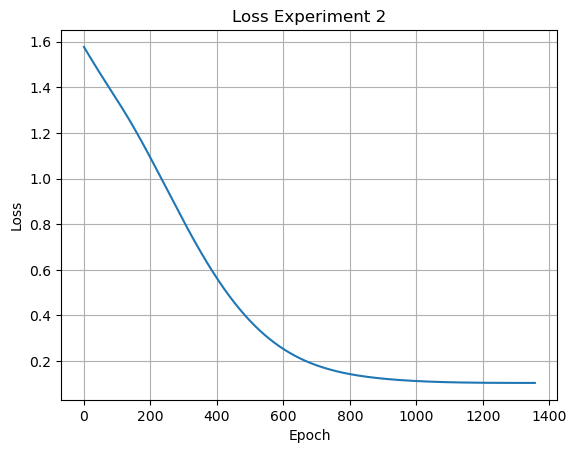

In [50]:
loss_2 = np.load('results_little_experiment_2/loss.npy')
plt.plot(loss_2)
plt.title('Loss Experiment 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

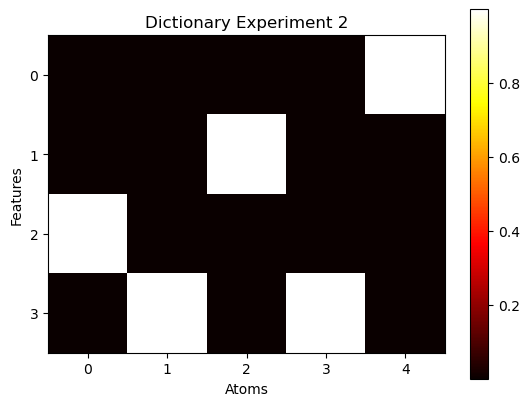

[[0.0001 0.0001 0.0001 0.0001 0.9991]
 [0.0001 0.0002 0.9995 0.0001 0.0003]
 [0.9997 0.0002 0.0002 0.0003 0.0004]
 [0.0001 0.9995 0.0002 0.9995 0.0002]]


In [51]:
D_2 = np.load('results_little_experiment_2/dictionary.npy')
plt.imshow(D_2, cmap='hot', interpolation='nearest')
plt.title('Dictionary Experiment 2')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D_2.shape[1], 1))
plt.yticks(np.arange(0, D_2.shape[0], 1))
plt.colorbar()
plt.show()
print(D_2)

[[0.0072 0.0002 0.0002 0.9928]
 [0.0029 0.0001 0.4995 0.0003]
 [0.0928 0.9919 0.0003 0.0003]
 [0.0031 0.0033 0.4986 0.0008]
 [0.8939 0.0045 0.0014 0.0058]]


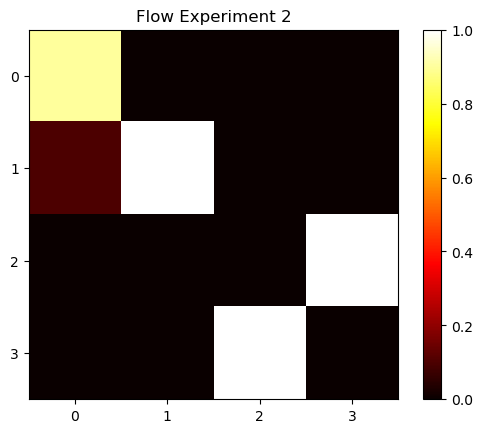

In [52]:
weights_2 = np.load('results_little_experiment_2/weights.npy')
print(weights_2[1])
weights_2[1].sum(axis=1)
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow Experiment 2')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()

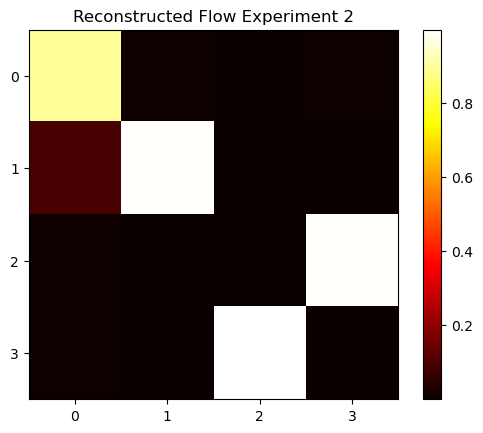

[[0.8931 0.0046 0.0016 0.0059]
 [0.093  0.9914 0.0004 0.0004]
 [0.0076 0.0004 0.0004 0.9925]
 [0.0062 0.0036 0.9976 0.0012]]


In [53]:
fs_reconstructed_2 = D_2@weights_2[1]
plt.imshow(fs_reconstructed_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 2')
plt.xticks(np.arange(0, fs_reconstructed_2.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed_2)

Datos sintéticos (más pesados)

In [2]:
bf = []

for i in range(1, 5):
    f = np.load(f'synthetic_data2/f{i}.npy')
    bf.append(f)

In [3]:
for i in range(len(bf)):
    print(f'Flow {i+1}')
    print(bf[i])

Flow 1
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  1.  0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.2 0.2 0.  0.  0.2 0.  0.  0.2]
 [0.  0.2 0.5 0.5 0.  0.  0.5 0.  0.3 0.3]
 [0.  0.  0.2 0.2 0.3 0.  0.2 0.  0.1 0.2]
 [0.  0.1 0.1 0.1 0.1 1.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.3 0.2]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.2 0. ]]
Flow 2
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.3 0.5 0.  0.  0.  0.3]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.1]
 [0.  0.  1.  1.  0.4 0.  0.  0.  1.  0.4]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.  0.  0.  0.  0.3 0.3 0.  0. ]
 [0.1 0.  0.  0.  0.2 0.  0.1 0.1 0.  0.2]
 [0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.1 0.1 0.  0. ]]
Flow 3
[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.1 0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0

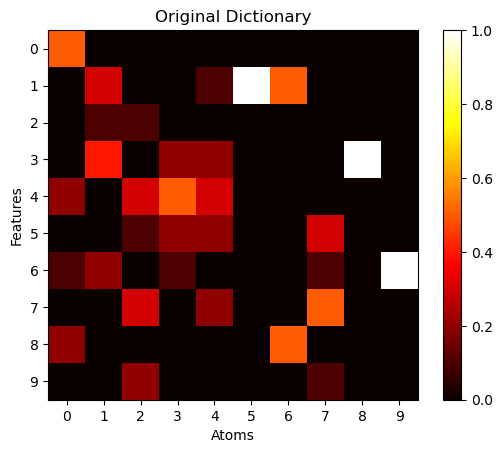

In [4]:
original_dictionary = np.load('synthetic_data2/dictionary.npy')
plt.imshow(original_dictionary, cmap='hot', interpolation='nearest')
plt.title('Original Dictionary')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, original_dictionary.shape[1], 1))
plt.yticks(np.arange(0, original_dictionary.shape[0], 1))
plt.colorbar()
plt.show()

In [8]:
original_flows = np.load('synthetic_data2/flows.npy')
original_flows.shape

(120, 10, 10)

Con 9 átomos:

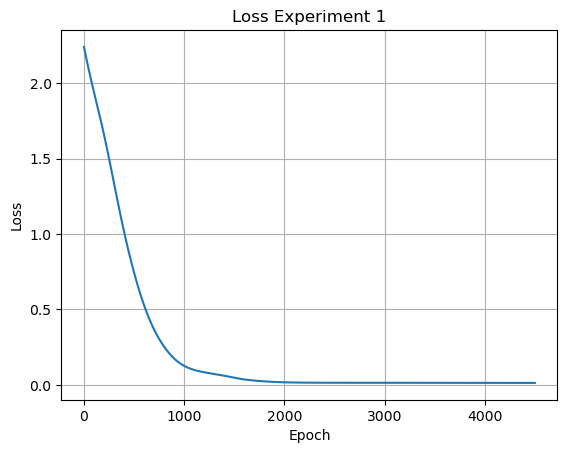

In [5]:
loss_1 = np.load('results_middle_experiment_1/loss.npy')
plt.plot(loss_1)
plt.title('Loss Experiment 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [11]:
learned_dictionary_1 = np.load('results_middle_experiment_1/dictionary.npy')
learned_weights_1 = np.load('results_middle_experiment_1/weights.npy')

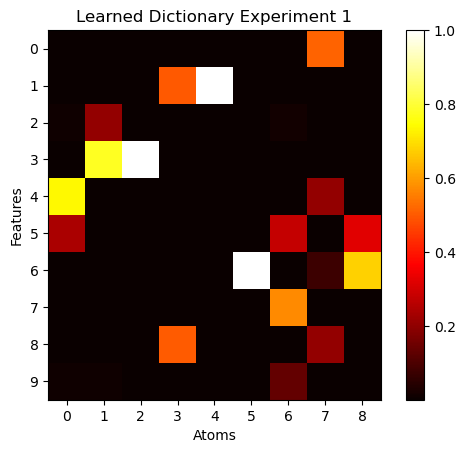

In [12]:
plt.imshow(learned_dictionary_1, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Experiment 1')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_1.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_1.shape[0], 1))
plt.colorbar()
plt.show()

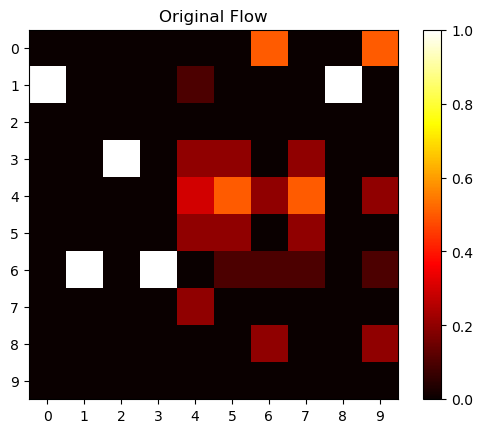

[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.1 0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.2 0.2 0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.3 0.5 0.2 0.5 0.  0.2]
 [0.  0.  0.  0.  0.2 0.2 0.  0.2 0.  0. ]
 [0.  1.  0.  1.  0.  0.1 0.1 0.1 0.  0.1]
 [0.  0.  0.  0.  0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [15]:
flow_0 = original_flows[0]
plt.imshow(flow_0, cmap='hot', interpolation='nearest')
plt.title('Original Flow')
plt.xticks(np.arange(0, flow_0.shape[1], 1))
plt.yticks(np.arange(0, flow_0.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(flow_0)

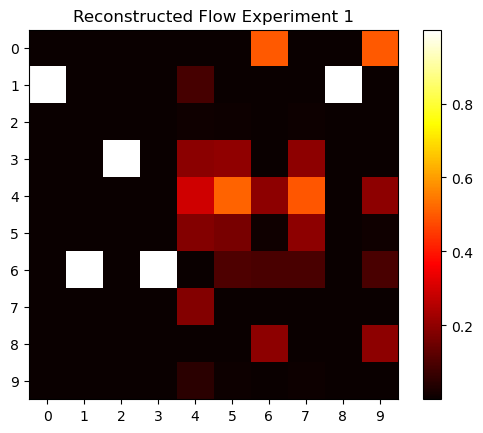

[[0.     0.     0.     0.     0.     0.     0.4962 0.     0.     0.4964]
 [0.9998 0.     0.     0.     0.092  0.     0.     0.0001 0.9998 0.    ]
 [0.     0.     0.0002 0.     0.0086 0.0071 0.0007 0.0068 0.     0.0007]
 [0.     0.     0.9998 0.     0.192  0.2015 0.     0.196  0.     0.    ]
 [0.     0.     0.     0.     0.2938 0.5124 0.1976 0.4947 0.     0.1977]
 [0.     0.0031 0.     0.003  0.1835 0.167  0.0098 0.1989 0.     0.0101]
 [0.     0.9969 0.     0.9969 0.     0.1016 0.097  0.0946 0.0001 0.0964]
 [0.     0.     0.     0.     0.1826 0.0026 0.     0.0016 0.     0.    ]
 [0.0001 0.     0.     0.     0.     0.     0.1967 0.0001 0.     0.1968]
 [0.     0.     0.     0.     0.0473 0.0077 0.0019 0.0073 0.     0.0019]]


In [19]:
reconstructed_flow_0_1 = learned_dictionary_1 @ learned_weights_1[0]
plt.imshow(reconstructed_flow_0_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 1')
plt.xticks(np.arange(0, reconstructed_flow_0_1.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_0_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_0_1)

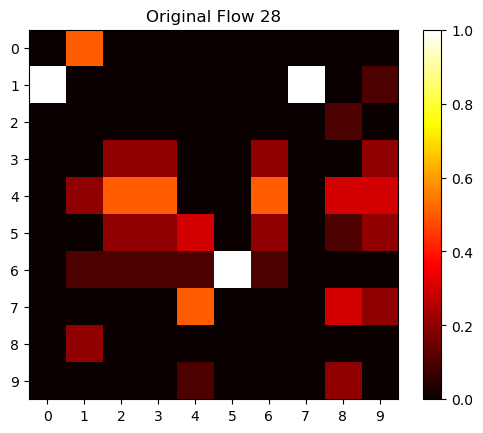

[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  1.  0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.2 0.2 0.  0.  0.2 0.  0.  0.2]
 [0.  0.2 0.5 0.5 0.  0.  0.5 0.  0.3 0.3]
 [0.  0.  0.2 0.2 0.3 0.  0.2 0.  0.1 0.2]
 [0.  0.1 0.1 0.1 0.1 1.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.3 0.2]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.2 0. ]]


In [28]:
flow_54 = original_flows[28]
plt.imshow(flow_54, cmap='hot', interpolation='nearest')
plt.title('Original Flow 28')
plt.xticks(np.arange(0, flow_54.shape[1], 1))
plt.yticks(np.arange(0, flow_54.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(flow_54)

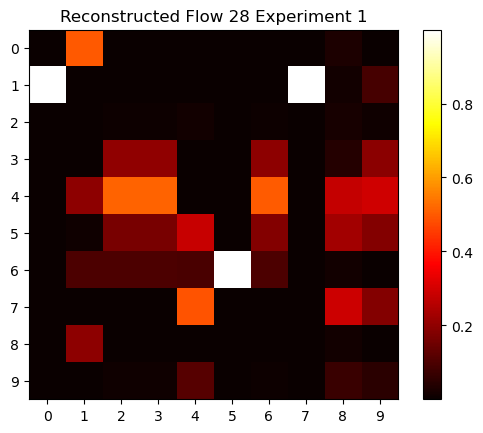

[[0.     0.4961 0.     0.     0.     0.     0.0001 0.     0.028  0.    ]
 [0.9998 0.     0.0001 0.     0.     0.     0.0001 0.9998 0.0131 0.092 ]
 [0.     0.0007 0.0071 0.0071 0.0125 0.     0.0069 0.     0.0215 0.0086]
 [0.     0.     0.2011 0.2013 0.     0.     0.1973 0.0001 0.0392 0.192 ]
 [0.     0.1976 0.5118 0.5122 0.0014 0.     0.5017 0.     0.2791 0.2938]
 [0.     0.0086 0.1675 0.1671 0.2841 0.0029 0.1829 0.     0.2286 0.1835]
 [0.     0.0984 0.1013 0.1014 0.096  0.997  0.1    0.     0.0128 0.    ]
 [0.     0.     0.0032 0.0029 0.49   0.     0.0031 0.     0.2924 0.1826]
 [0.     0.1967 0.     0.     0.     0.     0.0001 0.     0.0119 0.    ]
 [0.     0.0019 0.0079 0.0078 0.116  0.     0.0077 0.     0.0735 0.0473]]


In [29]:
recconstructed_flow_28_1 = learned_dictionary_1 @ learned_weights_1[28]
plt.imshow(recconstructed_flow_28_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow 28 Experiment 1')
plt.xticks(np.arange(0, recconstructed_flow_28_1.shape[1], 1))
plt.yticks(np.arange(0, recconstructed_flow_28_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(recconstructed_flow_28_1)

Experimento 2 con 10 átomos

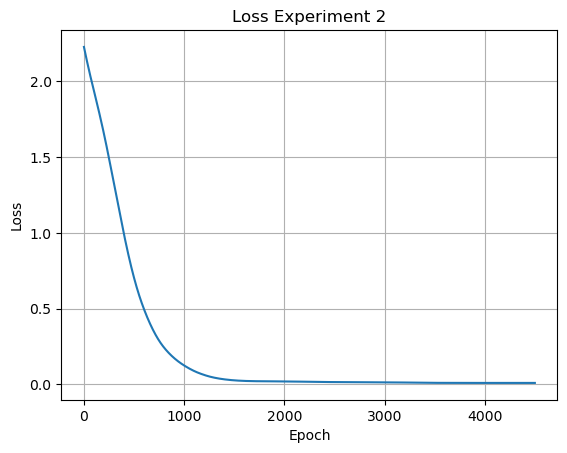

In [16]:
loss_2 = np.load('results_middle_experiment_2/loss.npy')
plt.plot(loss_2)
plt.title('Loss Experiment 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [17]:
learned_dictionary_2 = np.load('results_middle_experiment_2/dictionary.npy')
learned_weights_2 = np.load('results_middle_experiment_2/weights.npy')

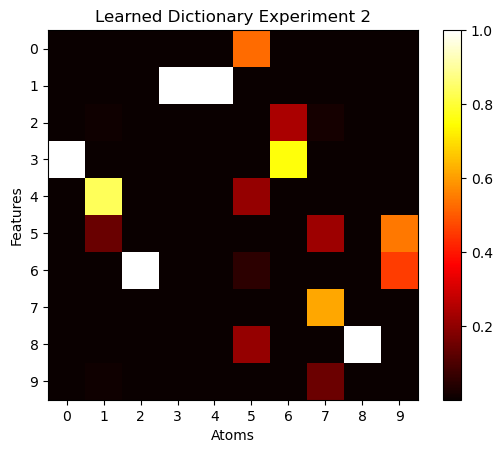

In [18]:
plt.imshow(learned_dictionary_2, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Experiment 2')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_2.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_2.shape[0], 1))
plt.colorbar()
plt.show()

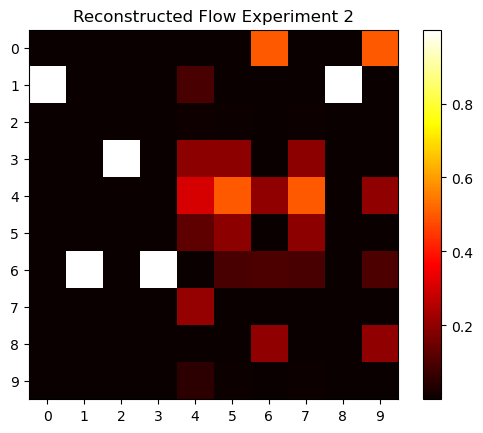

[[0.     0.     0.     0.     0.     0.     0.4994 0.     0.     0.4994]
 [0.9998 0.     0.     0.     0.0967 0.     0.0001 0.     0.9999 0.0001]
 [0.     0.     0.0001 0.     0.0096 0.0068 0.0008 0.0068 0.     0.0008]
 [0.     0.     0.9976 0.     0.1969 0.1969 0.     0.1969 0.     0.    ]
 [0.     0.     0.     0.     0.3077 0.4963 0.1995 0.4963 0.     0.1995]
 [0.     0.0002 0.0022 0.0002 0.128  0.199  0.0001 0.1989 0.     0.0001]
 [0.     0.9998 0.     0.9998 0.     0.0944 0.0994 0.0945 0.     0.0994]
 [0.     0.     0.     0.     0.2073 0.0001 0.     0.0001 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.1994 0.     0.     0.1994]
 [0.     0.     0.     0.     0.0538 0.0065 0.0014 0.0065 0.     0.0014]]


In [20]:
reconstructed_flow_0_2 = learned_dictionary_2 @ learned_weights_2[0]
plt.imshow(reconstructed_flow_0_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 2')
plt.xticks(np.arange(0, reconstructed_flow_0_2.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_0_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_0_2)

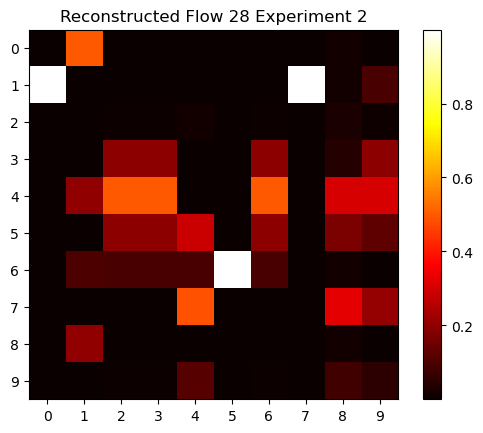

[[0.     0.4994 0.     0.     0.     0.     0.     0.     0.0156 0.    ]
 [0.9999 0.0001 0.     0.     0.     0.     0.     0.9999 0.0123 0.0967]
 [0.     0.0008 0.0068 0.0068 0.0128 0.     0.0068 0.     0.0254 0.0096]
 [0.     0.     0.1969 0.1969 0.     0.     0.1969 0.     0.04   0.1968]
 [0.     0.1995 0.4963 0.4963 0.0001 0.     0.4963 0.     0.3055 0.3077]
 [0.     0.0001 0.1985 0.1989 0.2883 0.0002 0.1989 0.     0.1685 0.128 ]
 [0.     0.0994 0.0949 0.0945 0.0957 0.9998 0.0945 0.     0.0123 0.0001]
 [0.     0.     0.0001 0.0001 0.4863 0.     0.     0.     0.3258 0.2072]
 [0.     0.1994 0.     0.     0.     0.     0.     0.     0.0123 0.    ]
 [0.     0.0014 0.0065 0.0065 0.1169 0.     0.0065 0.     0.0822 0.0538]]


In [30]:
reconstructed_flow_28_2 = learned_dictionary_2 @ learned_weights_2[28]
plt.imshow(reconstructed_flow_28_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow 28 Experiment 2')
plt.xticks(np.arange(0, reconstructed_flow_28_2.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_28_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_28_2)

Prueba 3 con 11 átomos

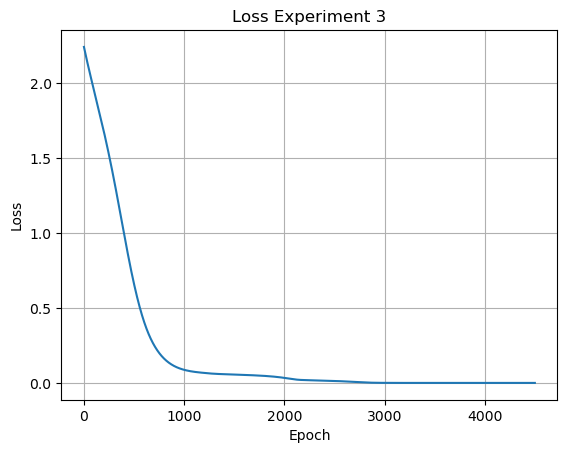

In [33]:
loss_3 = np.load('results_middle_experiment_3/loss.npy')
plt.plot(loss_3)
plt.title('Loss Experiment 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [34]:
learned_dictionary_3 = np.load('results_middle_experiment_3/dictionary.npy')
learned_weights_3 = np.load('results_middle_experiment_3/weights.npy')

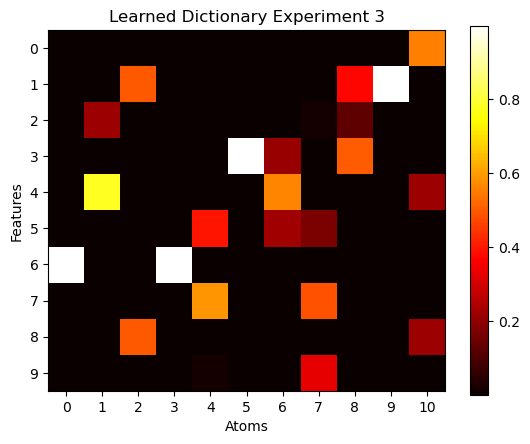

In [35]:
plt.imshow(learned_dictionary_3, cmap='hot', interpolation='nearest')
plt.title('Learned Dictionary Experiment 3')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, learned_dictionary_3.shape[1], 1))
plt.yticks(np.arange(0, learned_dictionary_3.shape[0], 1))
plt.colorbar()
plt.show()

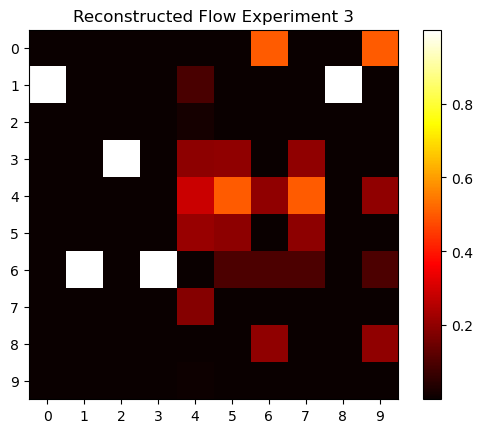

[[0.     0.     0.     0.     0.     0.     0.5    0.     0.     0.5   ]
 [0.9998 0.0001 0.0002 0.0001 0.0955 0.0002 0.     0.0002 0.9998 0.    ]
 [0.     0.     0.0001 0.     0.0188 0.0001 0.0003 0.0001 0.     0.0003]
 [0.     0.     0.9998 0.     0.1955 0.1999 0.     0.2    0.     0.    ]
 [0.     0.     0.     0.     0.289  0.5006 0.1999 0.5007 0.     0.1999]
 [0.     0.     0.     0.     0.2121 0.1983 0.     0.1983 0.     0.    ]
 [0.     0.9997 0.     0.9997 0.     0.0999 0.0999 0.1    0.     0.0999]
 [0.     0.     0.     0.     0.1841 0.0007 0.     0.0006 0.     0.    ]
 [0.0001 0.     0.     0.     0.     0.     0.1999 0.     0.0001 0.1999]
 [0.     0.     0.     0.     0.005  0.     0.     0.     0.     0.    ]]


In [36]:
recostructed_flow_0_3 = learned_dictionary_3 @ learned_weights_3[0]
plt.imshow(recostructed_flow_0_3, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 3')
plt.xticks(np.arange(0, recostructed_flow_0_3.shape[1], 1))
plt.yticks(np.arange(0, recostructed_flow_0_3.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(recostructed_flow_0_3)

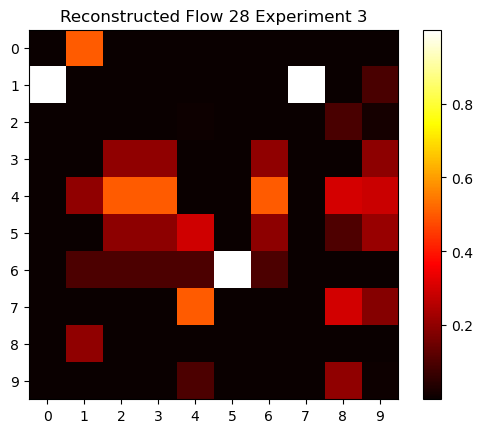

[[0.     0.4999 0.     0.     0.     0.     0.     0.     0.0001 0.    ]
 [0.9998 0.     0.0002 0.0002 0.0001 0.0001 0.0002 0.9998 0.0004 0.0955]
 [0.     0.0003 0.0001 0.0001 0.0042 0.     0.0001 0.     0.0948 0.0188]
 [0.     0.     0.2    0.2    0.0001 0.     0.2    0.     0.0004 0.1955]
 [0.     0.1999 0.5007 0.5007 0.0003 0.     0.5007 0.     0.3013 0.289 ]
 [0.     0.     0.1983 0.1983 0.2963 0.     0.1983 0.     0.1034 0.2121]
 [0.     0.0999 0.1    0.1    0.0996 0.9997 0.1    0.     0.0002 0.    ]
 [0.     0.     0.0007 0.0006 0.5018 0.     0.0007 0.     0.2974 0.1841]
 [0.0001 0.1999 0.     0.     0.     0.     0.     0.0001 0.0001 0.    ]
 [0.     0.     0.     0.     0.0977 0.     0.     0.     0.2019 0.005 ]]


In [37]:
reconstructed_flow_28_3 = learned_dictionary_3 @ learned_weights_3[28]
plt.imshow(reconstructed_flow_28_3, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow 28 Experiment 3')
plt.xticks(np.arange(0, reconstructed_flow_28_3.shape[1], 1))
plt.yticks(np.arange(0, reconstructed_flow_28_3.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(reconstructed_flow_28_3)